# Numpy

Numpy is a numerical library for python, used to work with numbers efficiently

In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [2]:
iris
iris.tail(10)

sepal_length  sepal_width  petal_length  petal_width    species
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142           5.8          2.7           5.1          1.9  virginica
143           6.8          3.2           5.9          2.3  virginica
144           6.7          3.3           5.7          2.5  virginica
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

In [3]:
iris.shape

(150, 5)

In [4]:
iris.describe() #numerical

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [5]:
iris['species'].nunique()

3

# Got

In [6]:
#TO USE datadotworld PACKAGE:
#1. create account at data.world, then run the next two lines:
#2. in terminal/powershell: pip install datadotworld[pandas]
#
#   IF THIS DOESN'T WORK BC YOU GET AN ERROR ABOUT "CCHARDET", RUN:
#    conda install -c conda-forge cchardet
#   THEN RERUN: pip install datadotworld[pandas] 
#
#3. in terminal/powershell: dw configure          
#3a. copy in API token from data.world (get from settings > advanced)

import datadotworld as dw
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

baby_names = dw.load_dataset('nkrishnaswami/us-ssa-baby-names-national')
baby_names = baby_names.dataframes['names_ranks_counts']

In [7]:
baby_names
baby_names.head(10)
baby_names.shape
baby_names.describe() #does it all make sense? any data issues?
baby_names['sex'].value_counts()

F    1156322
M     800376
Name: sex, dtype: int64

In [18]:
somenames = baby_names.loc[baby_names['name'] == 'John']
combined = somenames.groupby(['name','year'])['count'].sum().reset_index() #group by variables of the same time
combined

name  year  count
0    John  1880   9701
1    John  1881   8795
2    John  1882   9597
3    John  1883   8934
4    John  1884   9428
5    John  1885   8801
6    John  1886   9074
7    John  1887   8166
8    John  1888   9299
9    John  1889   8600
10   John  1890   8558
11   John  1891   7724
12   John  1892   9093
13   John  1893   8110
14   John  1894   8298
15   John  1895   8381
16   John  1896   8188
17   John  1897   7596
18   John  1898   8214
19   John  1899   7030
20   John  1900   9875
21   John  1901   6939
22   John  1902   7945
23   John  1903   7649
24   John  1904   8148
25   John  1905   8103
26   John  1906   8308
27   John  1907   9048
28   John  1908   9400
29   John  1909   9658
..    ...   ...    ...
109  John  1989  29978
110  John  1990  29154
111  John  1991  27864
112  John  1992  26297
113  John  1993  25058
114  John  1994  24226
115  John  1995  23281
116  John  1996  22217
117  John  1997  21408
118  John  1998  20651
119  John  1999  20385
120  John  2000  20119
121  John  2001  18917
122  John  2002  17467
123  John  2003  17255
124  John  2004  16518
125  John  2005  15802
126  John  2006  15196
127  John  2007  14452
128  John  2008  13335
129  John  2009  12125
130  John  2010  11565
131  John  2011  11063
132  John  2012  10626
133  John  2013  10720
134  John  2014  10701
135  John  2015  10384
136  John  2016  10007
137  John  2017   9444
138  John  2018   9132

[139 rows x 3 columns]

In [27]:
sns.lineplot(data=combined, x='year',y='count', hue = 'name')

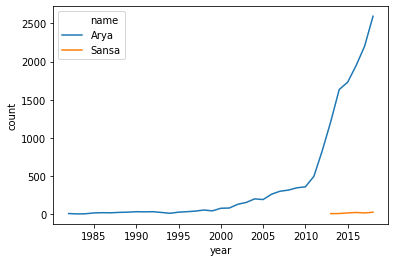

In [28]:
#Query
somenames = baby_names.query('name in ["Arya","Sansa"]')
combined = somenames.groupby(['name','year'])['count'].sum().reset_index()
sns.lineplot(data=combined,x='year', y='count',hue='name')

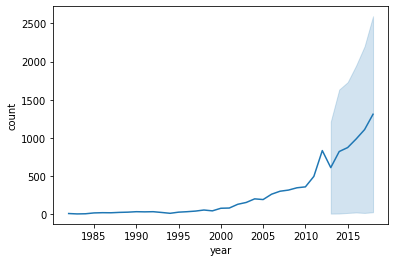

In [32]:
( #parenthesis 
baby_names
    .query('name in ["Arya","Sansa"]')
    .groupby(['name','year'])['count'].sum().reset_index() #combine M-F
    .pipe( #pipe in a function to apply to the object
            #syntax: <function>, arg1, arg2,...
        (sns.lineplot,'data') #call the function and tell it that the object in memory goes to the parameter 'data'
        ,x = 'year',y='count',
    )
)
#copy from lecture if it doesn't run

# My Turn Fred Data

In [33]:
import datetime
import pandas_datareader as pdr

start = datetime.datetime(2010, 1, 1) # you can specify start and end dates this way
end = datetime.datetime(2013, 1, 27)
macro_df = pdr.data.DataReader(['GDP','CPIAUCSL'], 'fred', start, end)

#what is the second series? CPI index for all urban consumers
#what is the frequency of the series? quarterly
#what is the average ANNUAL GDP, based on the data?

In [34]:
macro_df = pdr.data.DataReader(['GDPCA'], 'fred', start, end)

In [35]:
macro_df.describe()

GDPCA
count      4.000000
mean   16032.948250
std      394.227925
min    15598.753000
25%    15780.186250
50%    16018.835500
75%    16271.597500
max    16495.369000